In [1]:
# ! pip uninstall EfficientSurfaceCodeSim
# ! pip3 install git+https://github.com/JiakaiW/EfficientSurfaceCodeSim

In [1]:
from EfficientSurfaceCodeSim import MCSampleDecodeJob
import uuid
import itertools
import pickle
import zipfile
import os
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import json
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, TwoSlopeNorm

In [2]:
# d_to_shots = {3: int(1e5), # 5,000s, 83min
#               5:int(2e4), # 10,500s, 175 min
#               7:int(1e4), # 5,500 s, 91 min
#               9: int(1e4), # 11,000 s, 180 min
#               11: int(1e4) # 20700 s, 360 min
#               }# =>900 min per parameter set

distance_to_sec_per_shot = {
    3:0.1,
    5:0.2,
    7:0.5,
    9:1,
    11:2
}

num combinations 441


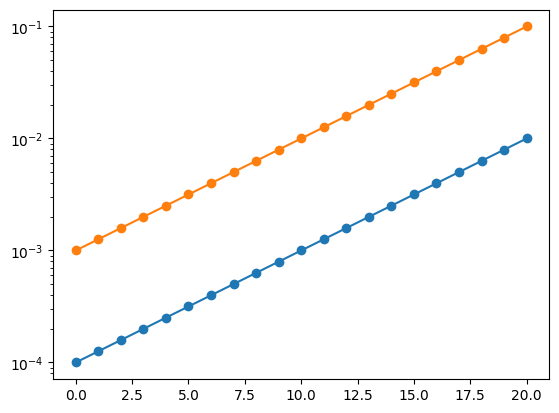

In [3]:
p_p_array = 10 ** np.linspace(-4,-2,21)
p_e_array = 10 ** np.linspace(-3,-1,21)

# print(f"p_p_array: {p_p_array}")
# print(f"p_e_array: {p_e_array}")
plt.plot(p_p_array,marker = 'o')
plt.plot(p_e_array,marker = 'o')
plt.yscale('log')

p_e_list = list(p_e_array)
p_p_list = list(p_p_array)

combinations = list(itertools.product(p_e_list,
                                      p_p_list))
print(f"num combinations {len(combinations)}")

In [4]:
# Variables needed throughout this work
X, Y = np.meshgrid(p_p_list, p_e_list)
int_x_list = np.arange(len(p_p_list))
int_y_list = np.arange(len(p_e_list))
int_X, int_Y = np.meshgrid(int_x_list, int_y_list)
X_eff = (X/0.01)**1
Y_eff = (Y/0.05)**2

p_tot_effective =  Y_eff + X_eff 
erasure_effective_fraction = Y_eff / p_tot_effective

# estimate logical error rate
d_arr = np.arange(0,300)
p_log_est = np.zeros(shape=(*d_arr.shape, *p_tot_effective.shape))
for i,d in enumerate(d_arr):
    p_log_est[i] = p_tot_effective**((d+1)/2)

# estimate how many shots we need to get 100 error
shots_needed_for_100_error = np.zeros_like(p_log_est)
for i,d in enumerate(d_arr):
    shots_needed_for_100_error[i] =100/p_log_est[i]

cbar_pad = 0.3
cbar_shrink = 0.7

In [5]:
def format_ax(ax):
    ax.set_xticks(np.arange(len(p_p_list)))
    ax.set_yticks(np.arange(len(p_e_list)))
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    pos = ax.get_position()
    ax_twin = fig.add_axes(pos, frameon=False)
    ax_twin.set_xlim(1e-4, 1e-2)
    ax_twin.set_ylim(1e-3, 1e-1)
    ax_twin.set_xscale('log')
    ax_twin.set_yscale('log')
    ax_twin.set_xlabel(r'$p_p$')
    ax_twin.set_ylabel(r'$p_e$')


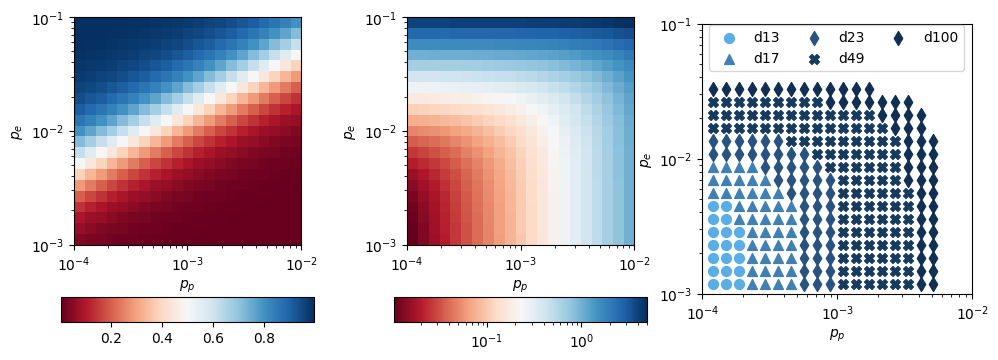

In [6]:

# fig,axes = plt.subplots(1,3,figsize=(12,4))
w = 10
h = 3.5
fig = plt.figure(figsize=(w, h)) 
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0+0.07, right=1/3-0.01,bottom=0.3,top = 0.95)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=1/3+0.07, right=2/3-0.01,bottom=0.3,top = 0.95)
ax3_length = 0.27
ax3_left = 2/3+0.045
axe_bottom = 0.16
gs2 = fig.add_gridspec(nrows=1, ncols=1,left= ax3_left, right=ax3_left + ax3_length,bottom=axe_bottom,top = axe_bottom + ax3_length*w/h)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs2[0])
gs3 = fig.add_gridspec(nrows=1, ncols=1,left=0+0.07, right=1/3-0.01,bottom=0.08,top = 0.15)
gs4 = fig.add_gridspec(nrows=1, ncols=1,left=1/3+0.07, right=2/3-0.01,bottom=0.08,top = 0.15)
gs5 = fig.add_gridspec(nrows=1, ncols=1,left=ax3_left, right=ax3_left + ax3_length,
                       bottom=axe_bottom+ ax3_length*w/h *4/5,top = axe_bottom + ax3_length*w/h)
ax3 = fig.add_subplot(gs3[0])
ax4 = fig.add_subplot(gs4[0])
ax5 = fig.add_subplot(gs5[0])

axes = [ax0,ax1,ax2]
ax = axes[0]
data = erasure_effective_fraction
norm = TwoSlopeNorm(vmin=data.min(), vcenter=0.5, vmax=data.max())
cax0 = ax.imshow(data, origin='lower', cmap='RdBu', norm=norm)
format_ax(ax)
# ax.set_title(r'$p^e_{eff} / p^{tot}_{eff}$')


ax = axes[1]
data = p_tot_effective
cax1 = ax.imshow(data, origin='lower', cmap='RdBu', norm=LogNorm())
format_ax(ax)
# ax.set_title(r'$ p^{tot}_{eff}$')

fig.colorbar(cax0, cax=ax3,orientation='horizontal',pad=cbar_pad, shrink=cbar_shrink)
fig.colorbar(cax1, cax=ax4,orientation='horizontal',pad=cbar_pad, shrink=cbar_shrink)

ax = axes[2]
level = 1e-12
drawn_mask = np.zeros_like(p_tot_effective, dtype=bool)
for d, color,marker in zip( [13,17, 23, 49, 100],
                    [(0.353, 0.678, 0.901),
                     (0.255, 0.502, 0.701),
                     (0.157, 0.322, 0.502),
                     (0.086, 0.231, 0.365),
                     (0.063, 0.184, 0.325),
                     (0.039, 0.137, 0.286)],
                    ['o','^',"d","X",'d']):
    current_mask = np.array(p_log_est[d] <= level, dtype=bool) & ~drawn_mask
    drawn_mask = drawn_mask | current_mask
    ax.scatter(int_X[current_mask], int_Y[current_mask], marker=marker, color=color, s=50, label=f'd{d}',alpha=1)
format_ax(ax)


handles, labels = ax2.get_legend_handles_labels()
ax5.legend(handles, labels,ncols=3,loc='lower left',columnspacing=1.4)
ax5.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.axis('off')

fig.savefig('new_fig01.pdf')

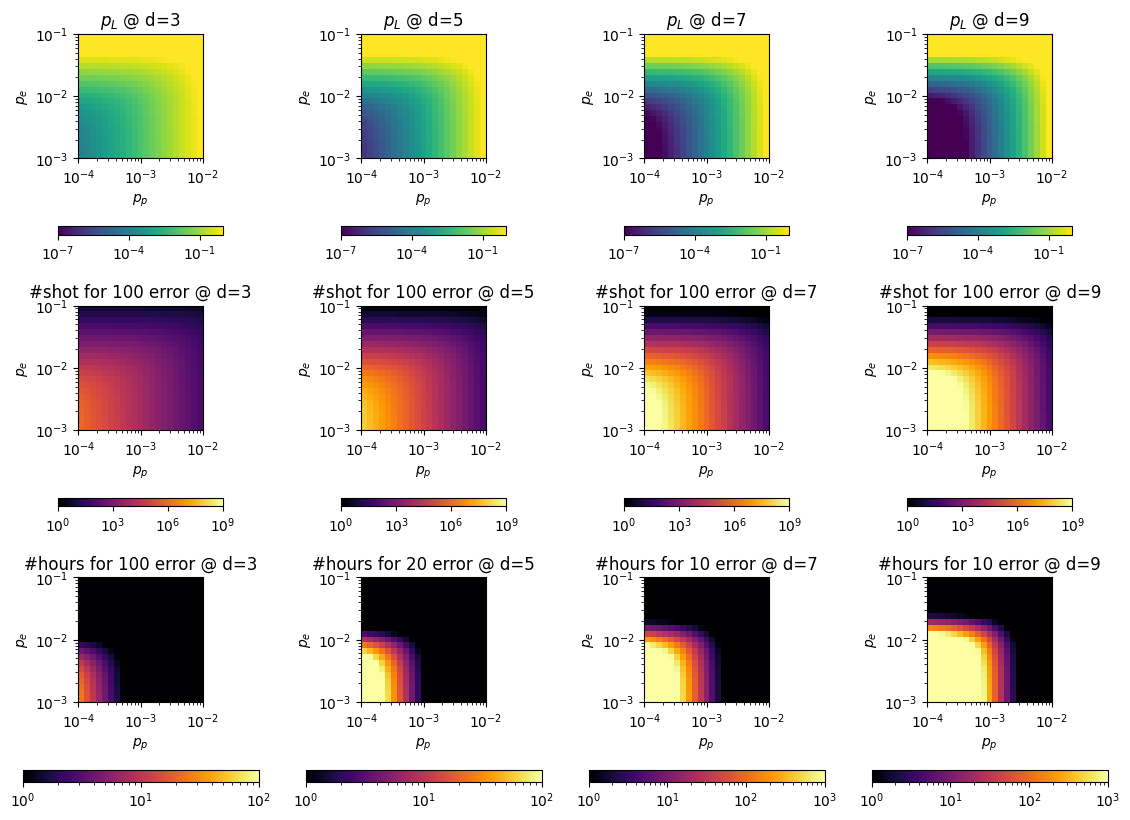

In [7]:
fig,axes = plt.subplots(3,4, figsize=(14,10))
for ax,d in zip(axes[0], [3,5,7,9]):
    cax = ax.imshow(p_log_est[d],norm=LogNorm(vmax=1,vmin=1e-7), origin='lower')
    ax.set_title(rf"$p_L$ @ d={d}")
    fig.colorbar(cax,orientation='horizontal',pad=cbar_pad, shrink=cbar_shrink)
    format_ax(ax)

for ax,d in zip(axes[1], [3,5,7,9]):
    cax = ax.imshow(shots_needed_for_100_error[d],norm=LogNorm(vmin=1,vmax=1e9), origin='lower',cmap='inferno')
    ax.set_title(rf"#shot for 100 error @ d={d}")
    fig.colorbar(cax,orientation='horizontal',pad=cbar_pad, shrink=cbar_shrink)
    format_ax(ax)

for ax,d, num_error,max_h in zip(axes[2], 
                           [3,5,7,9],
                           [100,20,10,10],
                           [1e2,1e2,1e3,1e3]):
    cax = ax.imshow(num_error/100*shots_needed_for_100_error[d]*distance_to_sec_per_shot[d]/60/60 ,norm=LogNorm(vmin=1,vmax=max_h), origin='lower',cmap='inferno')
    ax.set_title(rf"#hours for {num_error} error @ d={d}")
    fig.colorbar(cax,orientation='horizontal',pad=cbar_pad, shrink=1.0)
    format_ax(ax)


# Try to cleverly write the shot numbers, rough idea: 

### for distance 3 (~ 800 jobs)
1. if 100 logical error require less than 1 hours, do it with one job with shots that target 100 error. (~ 400 single job )
2. else more jobs to achieve 100 errors (~ 40 * 10 (lower left)  )

### for distance 5 (~ 700 jobs)
1. if 20 logical error require less than 1 hour, do it with one job with shots that target 20 error. (~ 300 single job )
2. else if require less than 10 hour more jobs to achieve 100 errors (~ 100 * 10 (lower left)  )

### for distance 7 (~ 800 jobs)
1. if 10 logical error require less than 1 hour, do it with one job with shots that target 10 error. (~ 300 single job )
2. else if require less than 20 hour more jobs to achieve 10 errors (~ 100 * 20 (lower left)  )

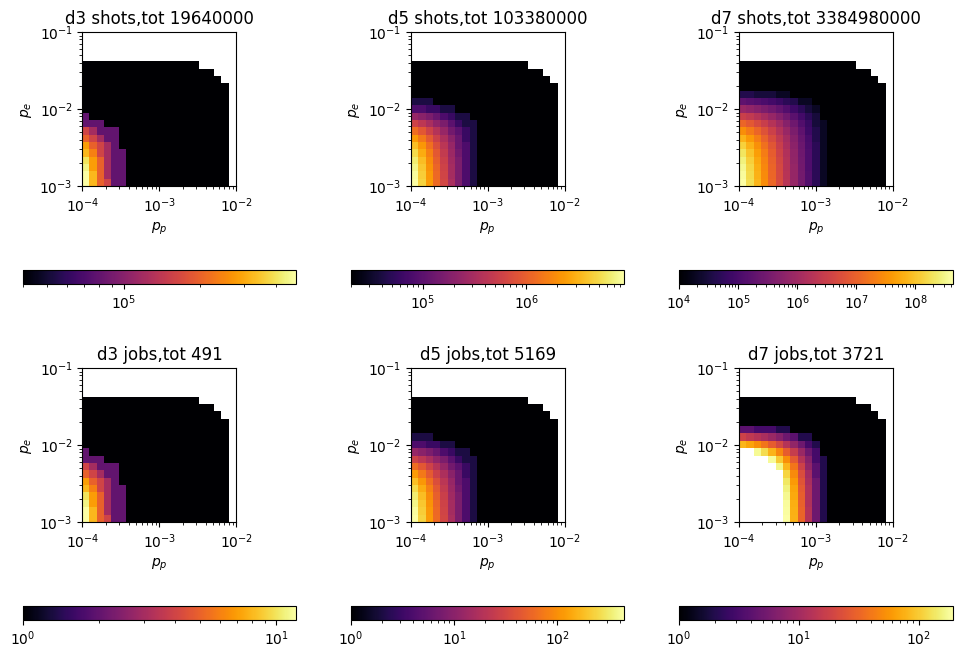

In [8]:
def increment_to_multiple(arr,val):
    remainder = arr % val
    increment = np.where(remainder != 0, val - remainder, 0)
    new_arr = arr + increment
    return new_arr

shots_per_job_dict = {
    3:40000,
    5:20000,
    7:10000,
    9:5000
}

tot_num_shot_arr_dict = {
    3:np.zeros_like(X,dtype=int),
    5:np.zeros_like(X,dtype=int),
    7:np.zeros_like(X,dtype=int)
}

num_jobs_arr_dict = {
    3:np.zeros_like(X,dtype=int),
    5:np.zeros_like(X,dtype=int),
    7:np.zeros_like(X,dtype=int)
}

fig,axes = plt.subplots(2,3, figsize=(12,8))


for col, d, num_error in zip([0,1,2],
                            [3,5,7],
                            [50,10,5],):
    ax = axes[0,col]
    tot_num_shot_arr_dict[d] =  np.maximum(num_error/100*shots_needed_for_100_error[d].astype(int), np.full_like(X,fill_value=shots_per_job_dict[d]).astype(int))
    tot_num_shot_arr_dict[d][p_log_est[d] > 1] = 0
    tot_num_shot_arr_dict[d] = increment_to_multiple(tot_num_shot_arr_dict[d], shots_per_job_dict[d])
    tot_num_shot_arr_dict[d] = tot_num_shot_arr_dict[d].astype('int')
    cax = ax.imshow(tot_num_shot_arr_dict[d],norm=LogNorm(), origin='lower',cmap='inferno')
    ax.set_title(rf"d{d} shots,tot {np.sum(tot_num_shot_arr_dict[d])}")
    fig.colorbar(cax,orientation='horizontal',pad=cbar_pad)
    format_ax(ax)
    ax = axes[1,col]
    num_jobs_arr_dict[d] = (tot_num_shot_arr_dict[d] / shots_per_job_dict[d]).astype('int')
    if d == 7:
        num_jobs_arr_dict[d][num_jobs_arr_dict[d] > 200]  = 0
    cax = ax.imshow(num_jobs_arr_dict[d],norm=LogNorm(), origin='lower',cmap='inferno')
    ax.set_title(rf"d{d} jobs,tot {np.sum(num_jobs_arr_dict[d])}")
    fig.colorbar(cax,orientation='horizontal',pad=cbar_pad)
    format_ax(ax)

In [9]:
for d in [3,5,7]:
    for i, p_p in enumerate(p_p_list):
        for j, p_e in enumerate(p_e_list):
            num_jobs = num_jobs_arr_dict[d][i,j]
            tot_shots = tot_num_shot_arr_dict[d][i,j]
            print(f"d={d}, p_p={p_p:.2e}, p_e={p_e:.2e},nj={num_jobs},ts={tot_shots}")

d=3, p_p=1.00e-04, p_e=1.00e-03,nj=12,ts=480000
d=3, p_p=1.00e-04, p_e=1.26e-03,nj=8,ts=320000
d=3, p_p=1.00e-04, p_e=1.58e-03,nj=5,ts=200000
d=3, p_p=1.00e-04, p_e=2.00e-03,nj=4,ts=160000
d=3, p_p=1.00e-04, p_e=2.51e-03,nj=2,ts=80000
d=3, p_p=1.00e-04, p_e=3.16e-03,nj=2,ts=80000
d=3, p_p=1.00e-04, p_e=3.98e-03,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=5.01e-03,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=6.31e-03,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=7.94e-03,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=1.00e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=1.26e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=1.58e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=2.00e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=2.51e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=3.16e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=3.98e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=5.01e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=6.31e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=7.94e-02,nj=1,ts=40000
d=3, p_p=1.00e-04, p_e=1.00e-01,nj=0,ts=0
d=3, p_p=1.26e-04, p_e=1.00e-03,n

In [10]:
# counter = 0
# jobs_info = []
# for d in [3,5,7]:
#     for i, p_p in enumerate(p_p_list):
#         for j, p_e in enumerate(p_e_list):
#             num_jobs = num_jobs_arr_dict[d][i,j]
#             num_shots_per_job = shots_per_job_dict[d]
#             circuit_id=str(uuid.uuid4())
#             for _ in range(num_jobs):
#                 job_id=str(uuid.uuid4())
#                 job = MCSampleDecodeJob(
#                                 job_id=job_id,
#                                 circuit_id=circuit_id,
#                                 d = d,
#                                 p_e=p_e,
#                                 p_p=p_p,
#                                 shots=num_shots_per_job,
#                                 biased_erasure = False
#                                 )
#                 with open(f"{counter}.pkl", "wb") as f:
#                     pickle.dump(job, f)
#                 counter += 1

#                 jobs_info.append({
#                     "job_id": job_id,
#                     "circuit_id": circuit_id,
#                     "d": d,
#                     "p_e": p_e,
#                     "p_p": p_p,
#                     "shots": num_shots_per_job,
#                     "file": f"{counter}.pkl"
#                 })
# print(f"num_jobs: {counter}")

# # Save jobs information to a JSON file
# timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
# json_filename = f"jobs_info_{timestamp}.json"
# with open(json_filename, "w") as json_file:
#     json.dump(jobs_info, json_file, indent=4)

# def pack_pkl_files_to_zip(zip_filename="erasure_input.zip"):
#     with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         for filename in os.listdir('.'):
#             name, ext = os.path.splitext(filename)
#             if ext == '.pkl' and name.isdigit():
#                 zipf.write(filename)
#                 os.remove(filename)
                
# pack_pkl_files_to_zip(zip_filename="erasure_input_oct_7unbiased.zip")

num_jobs: 9381


In [10]:
import os
import json
import pandas as pd

json_list = []
directory = "erasure_decode_result_unbiased"
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as f:
            json_data = json.load(f)
        json_list.append(json_data)

df = pd.DataFrame(json_list)


In [161]:
# df.drop('job_id', axis=1, inplace=True)
agg_rules = {
    'shots': 'sum',
    'new_circ': 'sum',
    # 'p_e': 'first',
    # 'p_p': 'first',
}

df_grouped = df.groupby(['p_e', 'p_p','d']).agg(agg_rules).reset_index()
df_grouped['p_logi_era'] = df_grouped['new_circ'] / df_grouped['shots']
# df_grouped['p_logi_normal'] = df_grouped['normal'] / df_grouped['shots']


In [170]:
p_logi_era_arr_dic = {}
shot_dic = {}
error_dic = {}
for d in [3,5,7]:
    df_filtered = df_grouped[df_grouped['d'] == d]
    pivot_table = df_filtered.pivot(index='p_p', columns='p_e', values='p_logi_era')
    p_logi_era_arr_dic[d] = pivot_table.values

    pivot_table = df_filtered.pivot(index='p_p', columns='p_e', values='shots')
    shot_dic[d] = pivot_table.values

    pivot_table = df_filtered.pivot(index='p_p', columns='p_e', values='new_circ')
    error_dic[d] = pivot_table.values

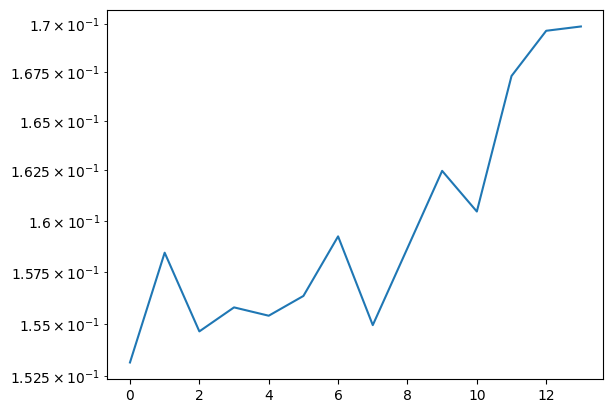

In [203]:
plt.plot(p_logi_era_arr_dic[3][:,-1])
plt.yscale('log')

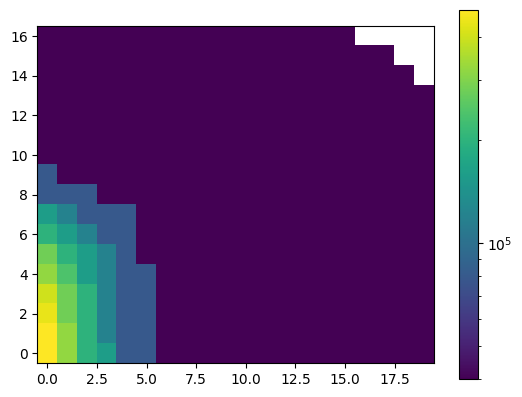

In [171]:
plt.imshow(shot_dic[3],origin='lower',norm=LogNorm())
plt.colorbar()

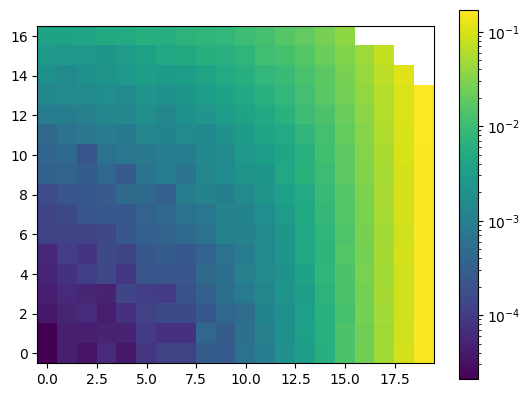

In [163]:
plt.imshow(p_logi_era_arr_dic[3],origin='lower',norm=LogNorm())
plt.colorbar()

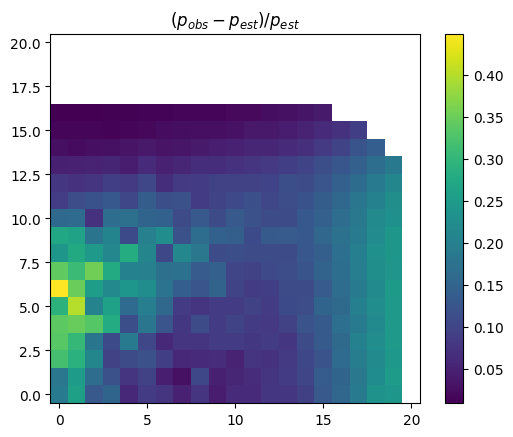

In [157]:


p_log_sample_d3 = np.full_like(X,fill_value=np.nan)
p_log_sample_d3[:17,:20] = p_logi_era_arr_dic[3]
plt.imshow((p_log_sample_d3)/p_log_est[3],origin='lower')
plt.title(rf"$(p_{{obs}} - p_{{est}})/p_{{est}}$")
plt.colorbar()

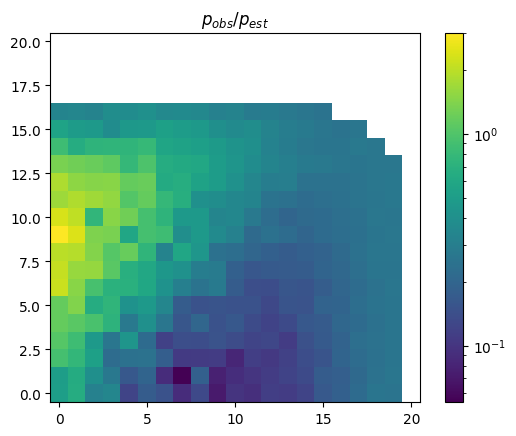

In [194]:

x_t = 0.01
x_v = 1.1
y_t = 0.13
y_v = 1.95



est = ((X/x_t)** x_v + (Y/y_t)**y_v) **((3+1)/2)
p_log_sample_d3 = np.full_like(X,fill_value=np.nan)
p_log_sample_d3[:17,:20] = p_logi_era_arr_dic[3]
plt.imshow(p_log_sample_d3/est,origin='lower',norm=LogNorm())
plt.title(rf"$p_{{obs}}/p_{{est}}$")
plt.colorbar()

In [200]:
from scipy.optimize import minimize

def log_mse(params, X, Y, p_log_sample_d3):
    x_t, x_v, y_t, y_v = params
    est = ((X/x_t)**x_v + (Y/y_t)**y_v) ** ((3 + 1) / 2)
    valid_mask = np.isfinite(p_log_sample_d3)
    log_est = np.log(est)
    log_p = np.log(p_log_sample_d3 + 1e-20)  # Avoid log(0)
    masked_log_est = log_est[valid_mask]
    masked_log_p = log_p[valid_mask]
    mse = np.mean((masked_log_p - masked_log_est)**2)
    return mse

# Initial parameter guess
initial_params = [0.01, 1.1 , 0.13, 1.95]

# Perform minimization
result = minimize(log_mse, initial_params, args=(X, Y, p_log_sample_d3), method='Nelder-Mead')
result.x

array([0.01592363, 1.35418405, 1.07362193, 0.81553321])

In [164]:
x =[]  # p
y =[] # e
d =[] # d
try_ =[]  # Number of attempts
success = []  # Number of error

for d_val in [3]:
    for i, p_p in enumerate(p_p_list):
        for j, p_e in enumerate(p_e_list):
            try:
                shots = df_grouped[( df_grouped['d'] == d_val) & (df_grouped['p_e'] == p_e_list[j]) & (df_grouped['p_p'] == p_p_list[i])]['shots'].values[0]
                positive = df_grouped[( df_grouped['d'] == d_val) & (df_grouped['p_e'] == p_e_list[j]) & (df_grouped['p_p'] == p_p_list[i])]['new_circ'].values[0]
                x.append(p_p)
                y.append(p_e)
                d.append(d_val)
                try_.append(shots)
                success.append(positive)
            except (IndexError, ValueError, KeyError) as e:
                continue

x = np.array(x)
y = np.array(y)
d = np.array(d)
try_ = np.array(try_)
success = np.array(success)

In [166]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt


with pm.Model() as model:
    # x_t = pm.Normal('x_t', mu=0.01, sigma=0.01)
    # y_t = pm.Normal('y_t', mu=0.05, sigma=0.02)

    x_t = pm.Normal('x_t', mu=0.01, sigma=0.1)
    y_t = pm.Normal('y_t', mu=0.05, sigma=0.1)
    
    x_v = pm.Normal('x_v', mu=1, sigma=0.5)
    y_v = pm.Normal('y_v', mu=2, sigma=1)

    R = ((x / x_t)**x_v + (y / y_t)**y_v)**((d + 1) / 2)
    
    p = pm.Deterministic('p', pm.math.sigmoid(R))
    
    likelihood = pm.Binomial('likelihood', n=try_, p=p, observed=success)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x_t, y_t, x_v, y_v]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
There were 97 divergences after tuning. Increase `target_accept` or reparameterize.


In [167]:
summary_stats = pm.summary(trace, hdi_prob=0.95)
print(summary_stats[['mean', 'hdi_2.5%', 'hdi_97.5%']])

         mean  hdi_2.5%  hdi_97.5%
p[0]    0.500     0.500      0.500
p[1]    0.500     0.500      0.500
p[2]    0.500     0.500      0.500
p[3]    0.500     0.500      0.500
p[4]    0.500     0.500      0.500
...       ...       ...        ...
p[332]  0.500     0.500      0.500
x_t     0.169     0.064      0.289
x_v     2.033     1.569      2.522
y_t     0.328     0.229      0.427
y_v     4.668     3.599      5.748

[337 rows x 3 columns]


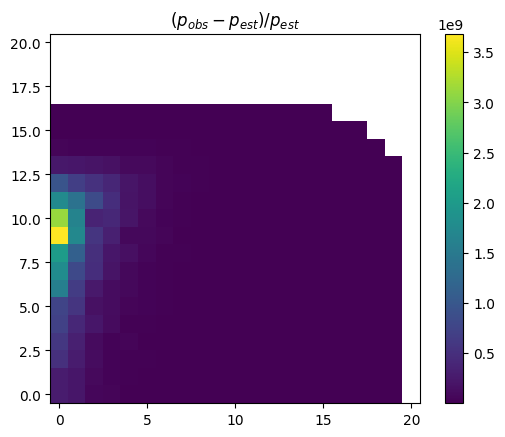

In [168]:
est = ((X/0.169)**2.033 + (Y/0.328)**4.668) **((3+1)/2)
p_log_sample_d3 = np.full_like(X,fill_value=np.nan)
p_log_sample_d3[:17,:20] = p_logi_era_arr_dic[3]
plt.imshow((p_log_sample_d3- est)/est,origin='lower')
plt.title(rf"$(p_{{obs}} - p_{{est}})/p_{{est}}$")
plt.colorbar()

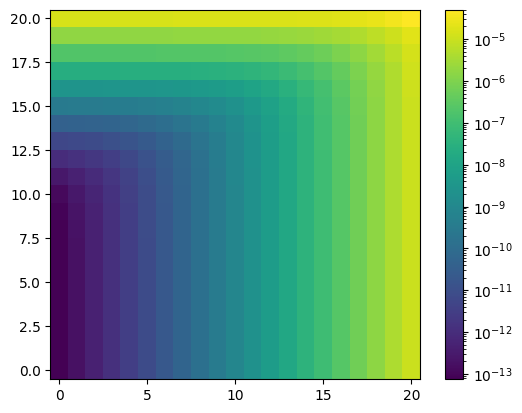

In [ ]:
plt.imshow(est,origin='lower',norm=LogNorm())
plt.colorbar()

# simluate the boundary cases (somehow there's bug in my code?)

In [16]:
counter = 0
jobs_info = []
for d in [3,5,7]:
    for i, p_p in enumerate(p_p_list):
        p_e = 0.0
        j = 0
        num_jobs = num_jobs_arr_dict[d][i,j] * 2
        num_shots_per_job = shots_per_job_dict[d]
        circuit_id=str(uuid.uuid4())
        for _ in range(num_jobs):
            job_id=str(uuid.uuid4())
            job = MCSampleDecodeJob(
                            job_id=job_id,
                            circuit_id=circuit_id,
                            d = d,
                            p_e=p_e,
                            p_p=p_p,
                            shots=num_shots_per_job,
                            biased_erasure = False
                            )
            with open(f"{counter}.pkl", "wb") as f:
                pickle.dump(job, f)
            counter += 1

            jobs_info.append({
                "job_id": job_id,
                "circuit_id": circuit_id,
                "d": d,
                "p_e": p_e,
                "p_p": p_p,
                "shots": num_shots_per_job,
                "file": f"{counter}.pkl"
            })
for d in [3,5,7]:
    p_p = 0.0
    i = 0
    for j, p_e in enumerate(p_e_list):
        num_jobs = num_jobs_arr_dict[d][i,j] * 2
        num_shots_per_job = shots_per_job_dict[d]
        circuit_id=str(uuid.uuid4())
        for _ in range(num_jobs):
            job_id=str(uuid.uuid4())
            job = MCSampleDecodeJob(
                            job_id=job_id,
                            circuit_id=circuit_id,
                            d = d,
                            p_e=p_e,
                            p_p=p_p,
                            shots=num_shots_per_job,
                            biased_erasure = False
                            )
            with open(f"{counter}.pkl", "wb") as f:
                pickle.dump(job, f)
            counter += 1

            jobs_info.append({
                "job_id": job_id,
                "circuit_id": circuit_id,
                "d": d,
                "p_e": p_e,
                "p_p": p_p,
                "shots": num_shots_per_job,
                "file": f"{counter}.pkl"
            })
print(f"num_jobs: {counter}")

# Save jobs information to a JSON file
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
json_filename = f"jobs_info_{timestamp}.json"
with open(json_filename, "w") as json_file:
    json.dump(jobs_info, json_file, indent=4)

def pack_pkl_files_to_zip(zip_filename="erasure_input.zip"):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for filename in os.listdir('.'):
            name, ext = os.path.splitext(filename)
            if ext == '.pkl' and name.isdigit():
                zipf.write(filename)
                os.remove(filename)
                
pack_pkl_files_to_zip(zip_filename="erasure_input_oct_9boundary.zip")

num_jobs: 7420


In [45]:
with open(f'{7373}.pkl', 'rb') as f:
    job = pickle.load(f)


In [46]:
from EfficientSurfaceCodeSim.circuit_builder import *
from EfficientSurfaceCodeSim.error_model import *

after_cz_error_model = get_2q_error_model(p_e=job.p_e,
                                            p_p=job.p_p,
                                            biased=job.biased_erasure)
builder = easure_circ_builder(rounds = job.d,
                                distance= job.d,
                                after_cz_error_model=after_cz_error_model,
                                measurement_error=0
                                )
builder.generate_helper()
builder.gen_erasure_conversion_circuit()

In [47]:


sampler = builder.erasure_circuit.compile_sampler() #expensive step, 16s for d13, 4s for d11, 0.7s for d9
meas_samples = sampler.sample(shots=job.shots)
converter = builder.erasure_circuit.compile_m2d_converter() #expensive step, 16s for d13, 4s for d11, 0.7s for d9
det_samples, actual_obs_chunk = converter.convert(measurements=meas_samples,
                                                        separate_observables=True)

In [48]:
det_samples

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [51]:
for i in range(job.shots):

    curve = 'S'
    single_measurement_sample = meas_samples[i]
    single_detector_sample  = det_samples[i]
    conditional_circ = builder.gen_posterior_circuit(single_measurement_sample)
    dem = conditional_circ.detector_error_model(approximate_disjoint_errors=True,decompose_errors=True)
    m = DEM_to_Matching(dem,curve = curve)
    result = m.decode(single_detector_sample)
    print(result)

[]
[1]
[0]
[1]
[0]
[1]
[]
[0]
[0]
[1]
[1]
[]
[]
[1]
[1]
[]
[1]
[0]
[0]
[1]
[0]
[]
[1]
[0]
[1]
[1]
[0]
[0]
[]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[]
[]
[1]
[0]
[0]
[]
[1]
[0]
[1]
[]
[0]
[0]
[1]
[]
[0]
[]
[1]
[1]
[1]
[]
[0]
[]
[0]
[1]
[0]
[]
[0]
[0]
[]
[0]


KeyboardInterrupt: 

In [52]:
i=0
curve = 'S'
single_measurement_sample = meas_samples[i]
single_detector_sample  = det_samples[i]
conditional_circ = builder.gen_posterior_circuit(single_measurement_sample)
dem = conditional_circ.detector_error_model(approximate_disjoint_errors=True,decompose_errors=True)
m = DEM_to_Matching(dem,curve = curve)
result = m.decode(single_detector_sample)

In [62]:
result

array([], dtype=uint8)